In [70]:
from multiprocessing import Process, Queue
import glob
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import math as m
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)

In [71]:
fuel = pd.read_csv('Fuel Efficiciency/Comb_2010_2017.csv', sep = ';',index_col=None,encoding='latin-1')
fuel.head(100)


IN  Train_Bulletin Sector  DateTime1  Id_Loc  Track_id  Id_Engineer  \
0   TREN           32175      N  26/4/2017      11         1         67.0   
1   TREN           32175      N  26/4/2017    5409         1         67.0   
2   TREN           32177      N  26/4/2017      11         1        104.0   
3   TREN           32178      N  26/4/2017    5409         1         67.0   
4   TREN           32187      N  27/4/2017    6931         1         18.0   
5   TREN           32188      N  27/4/2017      21         1         72.0   
6   TREN           32190      N  27/4/2017      21         1         72.0   
7   TREN           32207      N  28/4/2017      22         1         14.0   
8   TREN           32215      N  28/4/2017      22         1         14.0   
9   TREN           32238      N  30/4/2017      11         1         65.0   
10  TREN           32238      N  30/4/2017    6587         1         65.0   
11  TREN           32241      N  30/4/2017      11         1         39.0   
12  TREN           32242      N  30/4/2017    6587         1         65.0   
13  TREN           32244      N   1/5/2017      24         1         88.0   
14  TREN           32252      N   1/5/2017       9         1         85.0   
15  TREN           32257      N   2/5/2017       9         1         67.0   
16  TREN           32261      N   2/5/2017    6586         1        111.0   
17  TREN           32266      N   3/5/2017    6586         1        111.0   
18  TREN           32271      N   3/5/2017      18         1         26.0   
19  TREN           32272      N   3/5/2017      18         1         26.0   
20  TREN           32275      N   3/5/2017       4         1         12.0   
21  TREN           32285      N   4/5/2017       4         1         12.0   
22  TREN           32289      N   4/5/2017    6931         1         88.0   
23  TREN           32290      N   4/5/2017    6931         1         88.0   
24  TREN           32295      N   4/5/2017       8         1         14.0   
25  TREN           32298      N   5/5/2017       8         1         14.0   
26  TREN           32299      N   5/5/2017      14         1         64.0   
27  TREN           32308      N   5/5/2017       5         1         33.0   
28  TREN           32311      N   6/5/2017       5         1         33.0   
29  TREN           32311      N   6/5/2017      14         1         33.0   
..   ...             ...    ...        ...     ...       ...          ...   
70  TREN           32468      N  18/5/2017    6931         1         88.0   
71  TREN           32469      N  18/5/2017    6931         1         88.0   
72  TREN           32157      E  25/4/2017    6586         2         34.0   
73  TREN           32158      E  26/4/2017    6550         2         14.0   
74  TREN           32160      E  25/4/2017      10         2         33.0   
75  TREN           32161      E  26/4/2017      22         2         65.0   
76  TREN           32164      E  25/4/2017       2         2         38.0   
77  TREN           32164      E  25/4/2017    6180         2         38.0   
78  TREN           32170      E  26/4/2017    5886         2         78.0   
79  TREN           32170      E  26/4/2017    6587         2         78.0   
80  TREN           32172      E  27/4/2017    6691         2         38.0   
81  TREN           32174      E  27/4/2017       6         2         85.0   
82  TREN           32174      E  27/4/2017    6690         2         85.0   
83  TREN           32176      E  27/4/2017       4         2         21.0   
84  TREN           32179      E  26/4/2017       6         2        111.0   
85  TREN           32179      E  26/4/2017       9         2        111.0   
86  TREN           32183      E  28/4/2017      10         2         64.0   
87  TREN           32183      E  28/4/2017      18         2         64.0   
88  TREN           32186      E  27/4/2017       6         2         26.0   
89  TREN           32186      E  27/4/2017    6625         2         26.0   
90

In [72]:
fuel.dtypes

IN                 object
Train_Bulletin      int64
Sector             object
DateTime1          object
Id_Loc              int64
Track_id            int64
Id_Engineer       float64
Id_fireman        float64
Hours             float64
Kilometers        float64
Liters            float64
Net_Ton_Km        float64
Gross_Ton_km      float64
Net_Tons            int64
Gross_Tons          int64
Date               object
Locomotive          int64
Track              object
Maquinista         object
Auxiliar           object
Train_nbr          object
Id_Sub_Type       float64
Sub_Type           object
id_Type           float64
Type               object
Traccion           object
Direction         float64
Id_Model_Loc        int64
Model_Loc          object
Unnamed: 29       float64
Unnamed: 30       float64
dtype: object

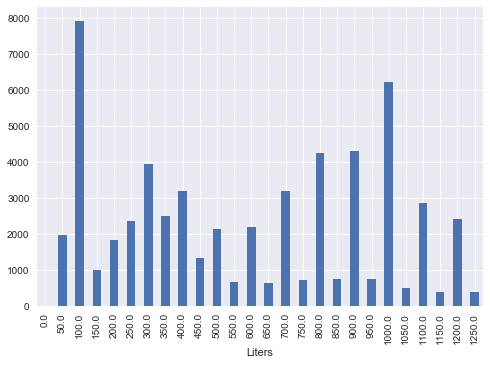

In [73]:
f = fuel
# Filter out Shunting Locomotives, choose only consumption between 40 and 1300 liters and postive GTK
f = f[(f.Liters >40) & (f.Liters < 1300) & (f.IN == 'TREN') & (f.Gross_Ton_km >0)]
# Show the distribution of consumption in 50 liter intervals
f.groupby(f.Liters // 50*50).size().plot(kind='bar')


In [74]:
#Doesnt work f = fuel
# Replace NaN with 0
#f[['Hours','Kilometers','Liters','Net_Ton_Km','Gross_Ton_km','Net_Ton_Km','Gross_Tons','Net_Tons']] = f[['Hours','Kilometers','Liters','Net_Ton_Km','Gross_Ton_km','Net_Ton_Km','Gross_Tons','Net_Tons']].fillna(0, inplace= True)
# Cast the following columns as float
#f[['Hours','Kilometers','Liters','Net_Ton_Km','Gross_Ton_km','Net_Ton_Km','Gross_Tons','Net_Tons']] = f[['Hours','Kilometers','Liters','Net_Ton_Km','Gross_Ton_km','Net_Ton_Km','Gross_Tons','Net_Tons']].astype(float)

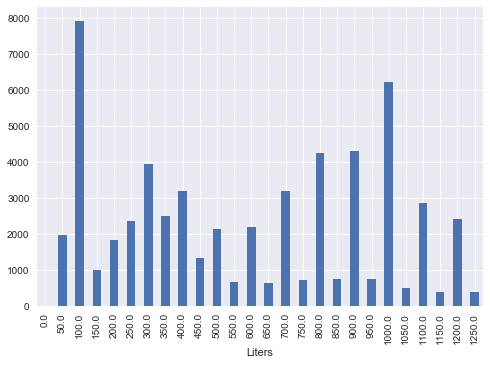

In [75]:
f = fuel
f.fillna(0, inplace= True)
# Filter Shunting Locomotives, choose only consumption between 40 and 1300 liters and postivo GTK
f = f[(f.Liters >40.0) & (f.Liters < 1300.0) & (f.IN == 'TREN') & (f.Gross_Ton_km >0.0)]
# Show the distribution of consumption in 50 liter intervals
f.groupby(f.Liters // 50*50).size().plot(kind='bar')


In [76]:
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)

C:\Users\225648\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [77]:
f.dtypes

IN                 object
Train_Bulletin      int64
Sector             object
DateTime1          object
Id_Loc              int64
Track_id            int64
Id_Engineer       float64
Id_fireman        float64
Hours             float64
Kilometers        float64
Liters            float64
Net_Ton_Km        float64
Gross_Ton_km      float64
Net_Tons            int64
Gross_Tons          int64
Date               object
Locomotive          int64
Track              object
Maquinista         object
Auxiliar           object
Train_nbr          object
Id_Sub_Type       float64
Sub_Type           object
id_Type           float64
Type               object
Traccion           object
Direction         float64
Id_Model_Loc        int64
Model_Loc          object
Unnamed: 29       float64
Unnamed: 30       float64
Lts_x_GTK         float64
dtype: object

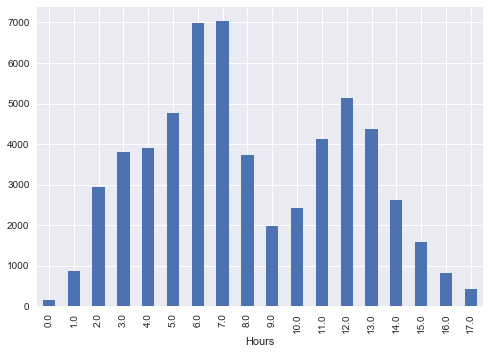

In [78]:
f = f[(f.Hours < 18.0)]
f.groupby(f.Hours // 1 ).size().plot(kind='bar')

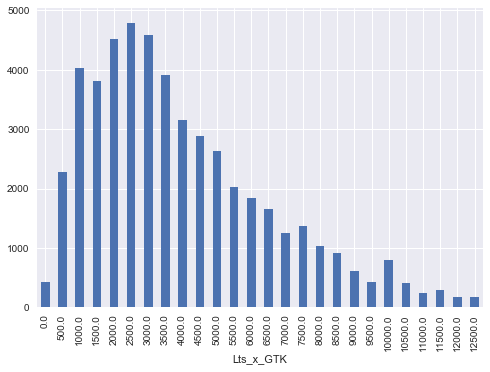

In [79]:
f = f[(f.Lts_x_GTK < 13000.0)]
f.groupby(f.Lts_x_GTK // 500*500 ).size().plot(kind='bar')


In [80]:
# percentaje of observations including shunting
len(f)/len(fuel)

0.545056829901104

In [81]:
z = fuel
z = z[(z.Gross_Ton_km <=0)]
len(z)

30585

In [82]:
# percentaje of observations excluding GTK < 0
len(f)/(len(fuel)-len(z))

0.8159819281024507

In [83]:
len(fuel)

92117

In [84]:
f.Type.value_counts()

CARGA         36817
PASAJEROS     10935
MIXTO          1260
ESPECIALES     1193
0                 4
Name: Type, dtype: int64

In [85]:
f.Sub_Type.value_counts()

CARGA GENERAL            28431
DERIVADOS DE PETROLEO     8386
EXPRESO ORIENTAL          6372
TREN REGIONAL             4489
TREN MIXTO AL SUR         1260
SERVICIO INTERNO          1054
LOCOMOTORA SOLA             99
AUTOMOTOR                   74
SOCORRO                     40
0                            4
Name: Sub_Type, dtype: int64

In [86]:
f.Model_Loc.value_counts()

GE U20C      26281
GE U10B      15285
GM            5960
GE C23EMP     2593
FB              69
0               21
Name: Model_Loc, dtype: int64

In [87]:
f.Locomotive.value_counts()

976     2412
2010    2373
2009    2352
2004    2275
2006    2275
2002    2201
2005    2167
2003    2101
2000    2065
2007    1970
975     1969
2001    1947
977     1866
978     1757
971     1737
2011    1597
1201    1551
974     1500
1203    1475
979     1470
972     1377
2008    1353
2012    1191
973     1177
1602    1109
1601     935
1202     886
2301     512
2303     421
2201     414
2302     409
2305     375
2307     310
2304     308
2306     258
331       27
347       23
1014      21
966       20
345       19
8689       4
Name: Locomotive, dtype: int64

In [88]:
f.Sector.value_counts()

E    43429
N     3869
S     2911
Name: Sector, dtype: int64

In [89]:
f.Direction.value_counts()

1.0    25738
0.0    24471
Name: Direction, dtype: int64

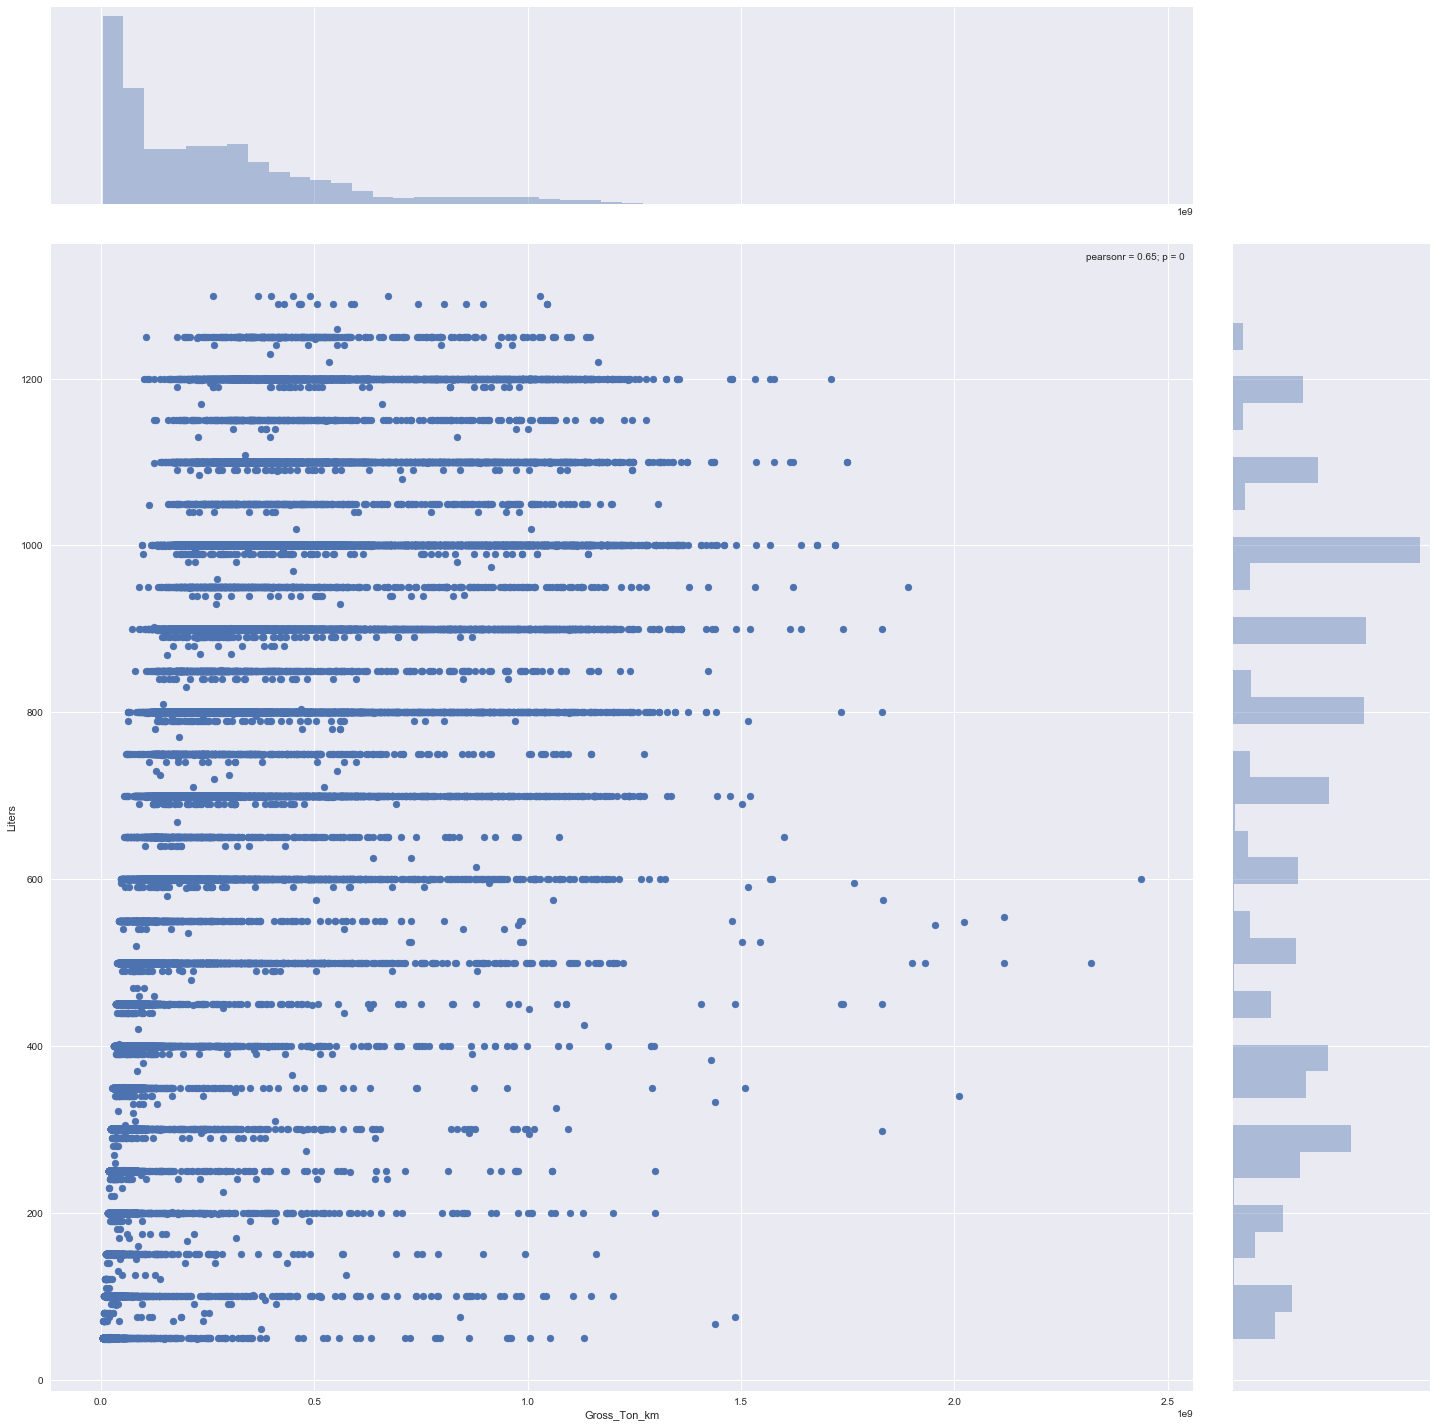

In [90]:
# Show the whole data distribution with a  joint
sns.jointplot(x="Gross_Ton_km", y="Liters", data=f, size=20)

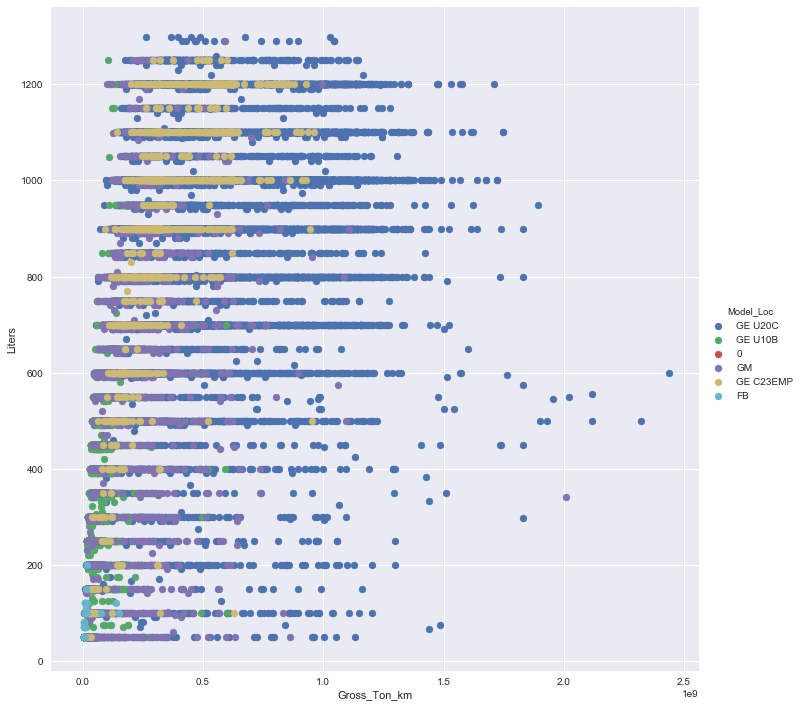

In [91]:
# We'll use seaborn's FacetGrid to color the scatterplot by Locomotive Type
sns.FacetGrid(f, hue="Model_Loc", size=10) \
   .map(plt.scatter, "Gross_Ton_km", "Liters") \
   .add_legend()


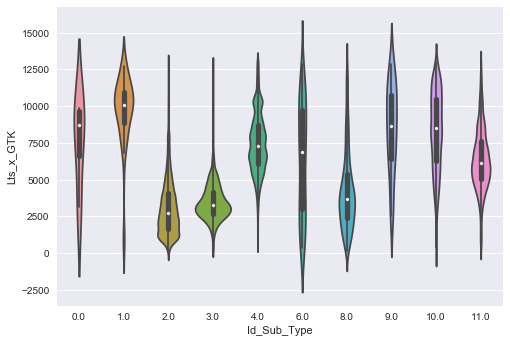

In [92]:
# A violin plot 
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Id_Sub_Type", y="Lts_x_GTK", data=f, size=60)

In [93]:
cols = list(f.loc[:,'Id_Sub_Type':'Sub_Type']) + list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK'] + ['Gross_Ton_km']
g= f[cols]
# Show the mean grouped by type of train
g.groupby(['Id_Sub_Type', 'Sub_Type']).mean()

Hours  Kilometers      Liters  \
Id_Sub_Type Sub_Type                                                   
0.0         0                       6.555000   97.000000  275.000000   
1.0         AUTOMOTOR               5.333514  248.297297   82.162162   
2.0         CARGA GENERAL           9.881580  182.108294  746.444444   
3.0         DERIVADOS DE PETROLEO  10.681488  210.925984  817.905199   
4.0         EXPRESO ORIENTAL        5.883192  212.416635  328.479598   
6.0         LOCOMOTORA SOLA         5.448081  137.165657  194.454545   
8.0         SERVICIO INTERNO        6.688890  138.564326  389.945920   
9.0         SOCORRO                 6.045000  126.052500  145.000000   
10.0        TREN MIXTO AL SUR       9.004667  267.192698  401.014286   
11.0        TREN REGIONAL           6.592698  212.297839  333.712854   

                                     Lts_x_GTK  Gross_Ton_km  
Id_Sub_Type Sub_Type                                          
0.0         0                      7605.773019  6.890394e+07  
1.0         AUTOMOTOR              9740.747754  1.284255e+07  
2.0         CARGA GENERAL          3107.799257  3.796463e+08  
3.0         DERIVADOS DE PETROLEO  3466.136703  2.605381e+08  
4.0         EXPRESO ORIENTAL       7496.301230  4.743337e+07  
6.0         LOCOMOTORA SOLA        6351.734160  5.436087e+07  
8.0         SERVICIO INTERNO       4234.795294  1.257920e+08  
9.0         SOCORRO                8504.590589  1.961473e+07  
10.0        TREN MIXTO AL SUR      8322.505848  5.601092e+07  
11.0        TREN REGIONAL          6366.768618  5.752051e+07

In [94]:
# Show the standard deviation grouped by type of train
g.groupby(['Id_Sub_Type', 'Sub_Type']).std()

Hours  Kilometers      Liters  \
Id_Sub_Type Sub_Type                                                  
0.0         0                      6.144078  110.245363  322.748612   
1.0         AUTOMOTOR              1.222070   29.209592   31.286142   
2.0         CARGA GENERAL          4.106595   77.853215  339.573601   
3.0         DERIVADOS DE PETROLEO  2.886228   56.510584  217.036662   
4.0         EXPRESO ORIENTAL       1.419153   55.577206   98.539653   
6.0         LOCOMOTORA SOLA        3.208541  102.286982  148.775840   
8.0         SERVICIO INTERNO       4.140819   75.016089  330.297865   
9.0         SOCORRO                3.750197   80.838436  105.490308   
10.0        TREN MIXTO AL SUR      1.420786   26.247349  139.534104   
11.0        TREN REGIONAL          1.615735   55.878445  105.416981   

                                     Lts_x_GTK  Gross_Ton_km  
Id_Sub_Type Sub_Type                                          
0.0         0                      3115.156208  1.130802e+08  
1.0         AUTOMOTOR              2380.871732  2.366289e+07  
2.0         CARGA GENERAL          1965.395829  3.051971e+08  
3.0         DERIVADOS DE PETROLEO  1212.176392  9.819936e+07  
4.0         EXPRESO ORIENTAL       2045.097300  2.064143e+07  
6.0         LOCOMOTORA SOLA        3734.407216  6.760554e+07  
8.0         SERVICIO INTERNO       2701.650275  1.227210e+08  
9.0         SOCORRO                2925.046868  1.630933e+07  
10.0        TREN MIXTO AL SUR      2657.565968  3.733370e+07  
11.0        TREN REGIONAL          2110.498836  2.374157e+07

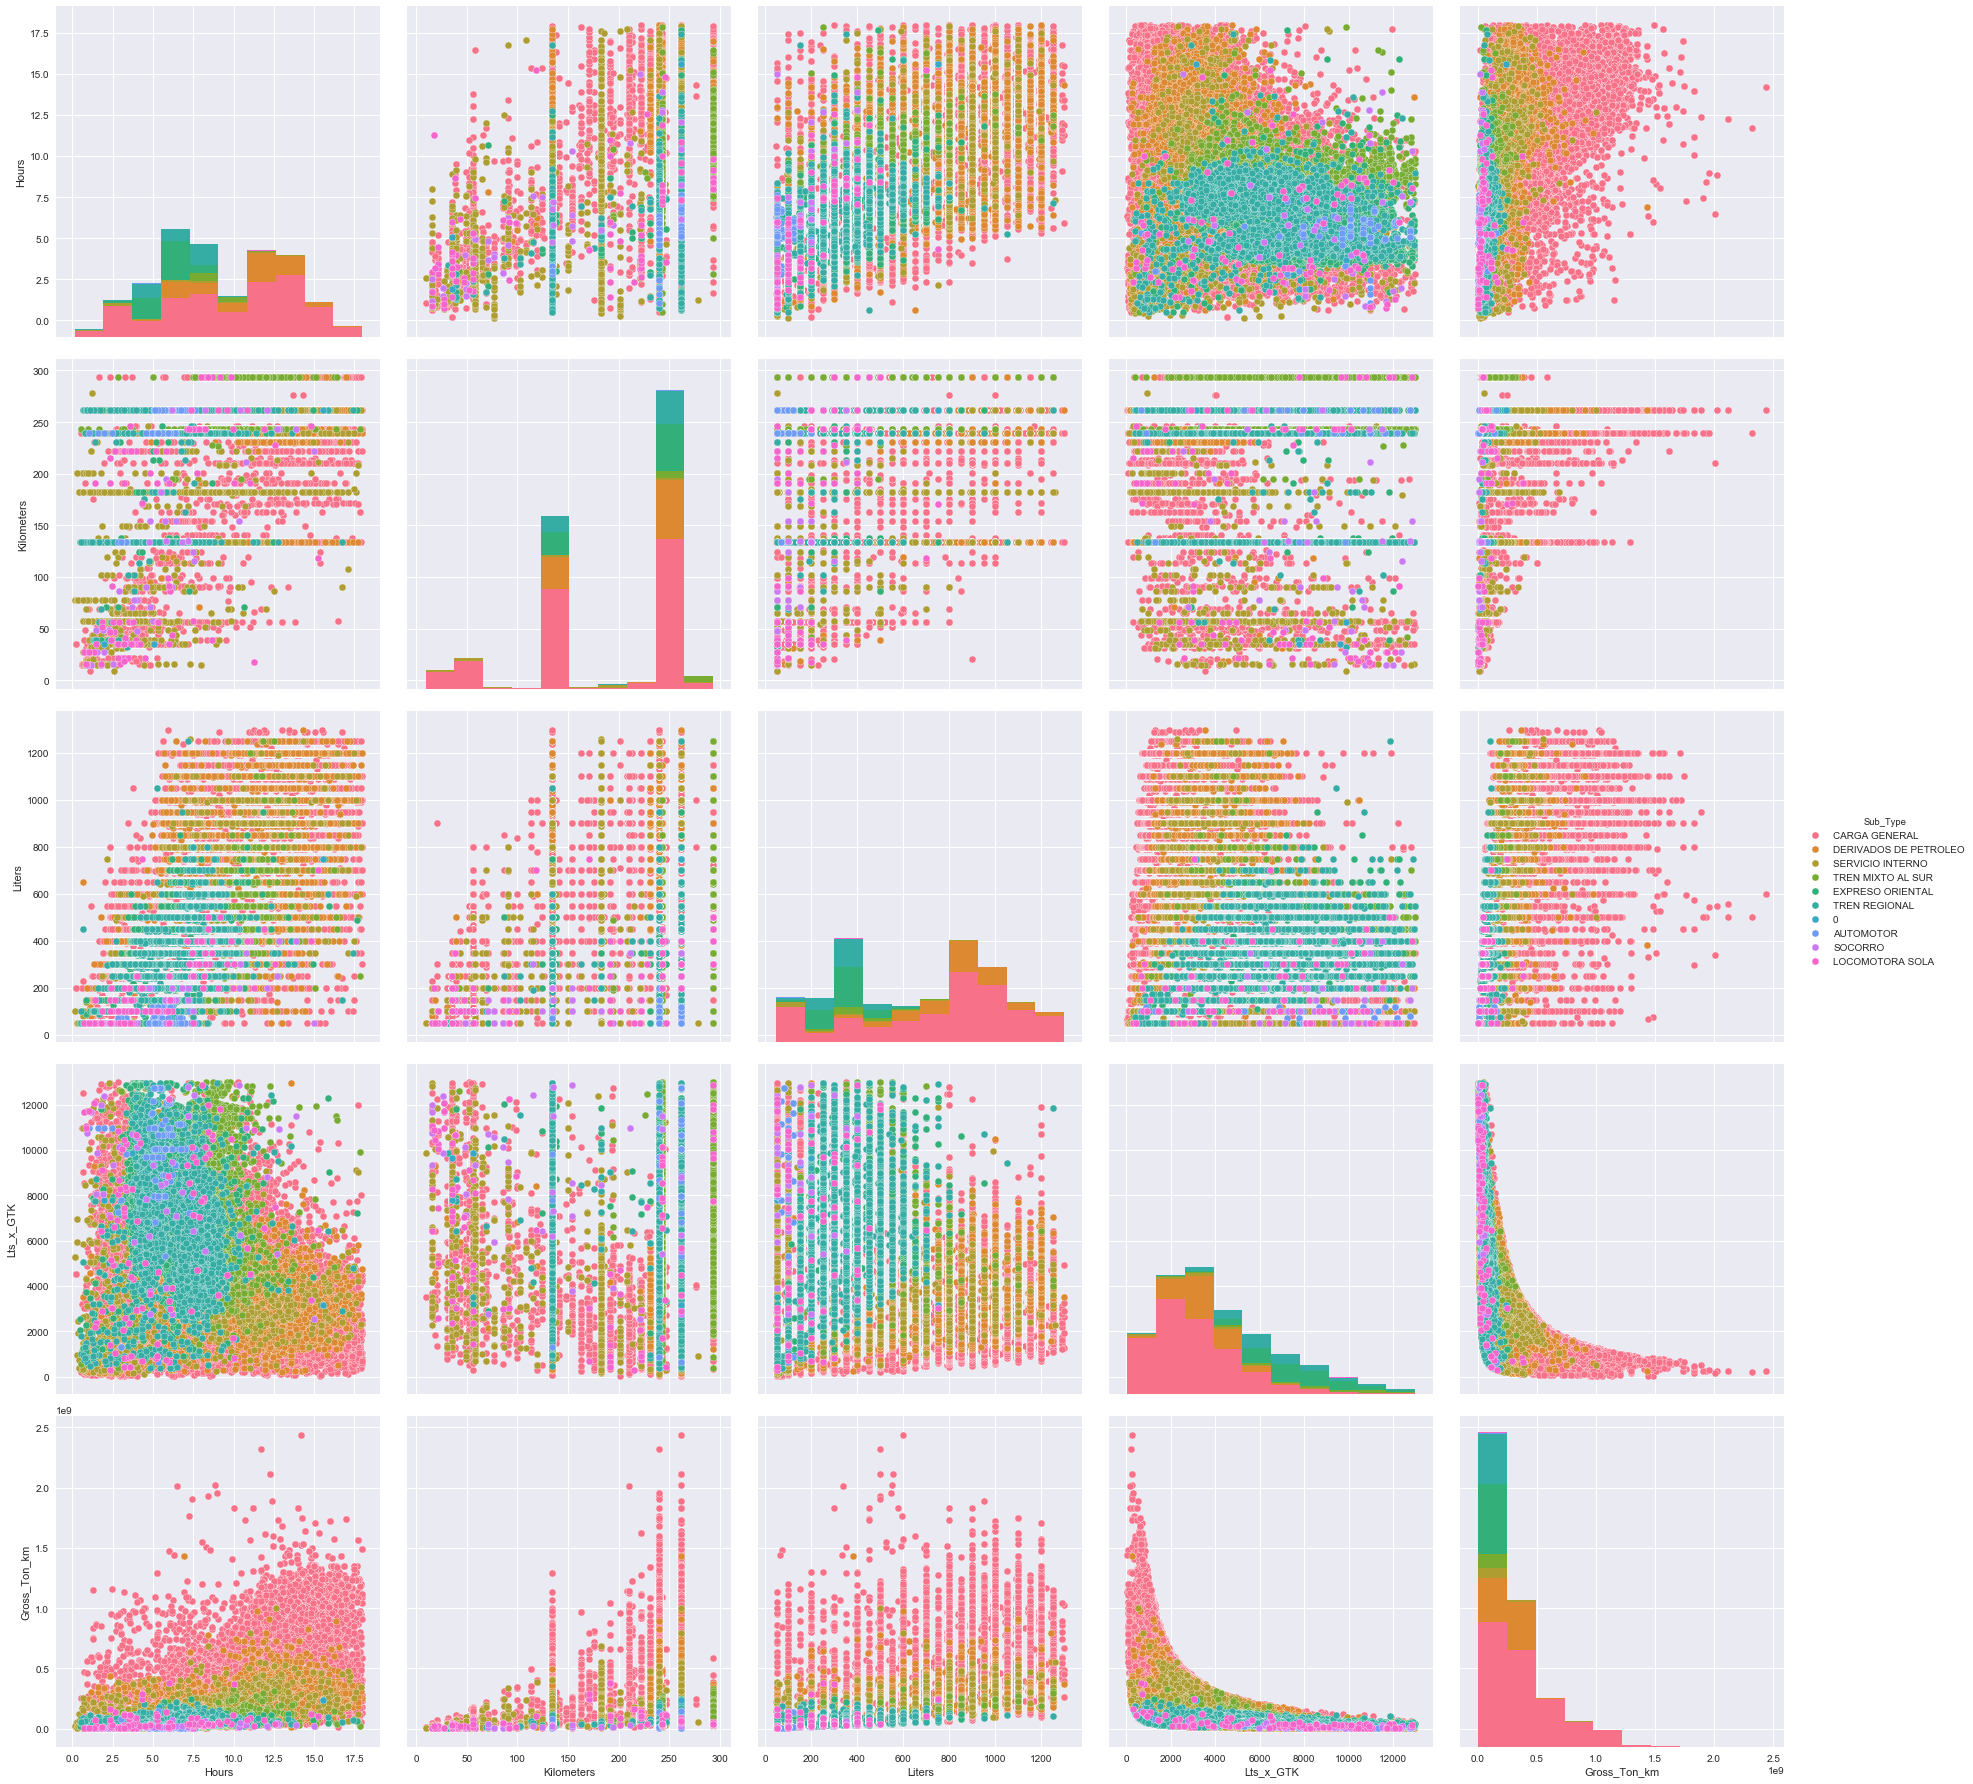

In [95]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(g.drop("Id_Sub_Type", axis=1), hue="Sub_Type", size=5)

In [96]:
# Don't take into account special trains - Short distance
f = f[(f.id_Type != 2.0)]

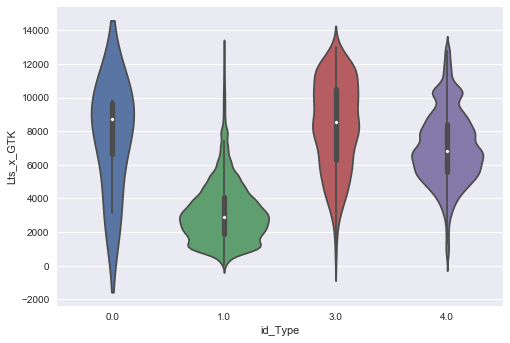

In [97]:
# A violin plot 
# Let's reduce the division to type of train
sns.violinplot(x="id_Type", y="Lts_x_GTK", data=f, size=60)

In [98]:
cols = list(f.loc[:,'id_Type':'Type']) + list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK'] + ['Gross_Ton_km']
gtype= f[cols]
# Show the mean grouped by type of train
gtype.groupby(['id_Type', 'Type']).mean()

Hours  Kilometers      Liters    Lts_x_GTK  \
id_Type Type                                                        
0.0     0           6.555000   97.000000  275.000000  7605.773019   
1.0     CARGA      10.063780  188.672249  762.721433  3189.419645   
3.0     MIXTO       9.004667  267.192698  401.014286  8322.505848   
4.0     PASAJEROS   6.170736  212.610681  328.961043  7047.797997   

                   Gross_Ton_km  
id_Type Type                     
0.0     0          6.890394e+07  
1.0     CARGA      3.525164e+08  
3.0     MIXTO      5.601092e+07  
4.0     PASAJEROS  5.134022e+07

In [99]:
# Show the standard deviation grouped by type of train
gtype.groupby(['id_Type', 'Type']).std()

Hours  Kilometers      Liters    Lts_x_GTK  Gross_Ton_km
id_Type Type                                                                  
0.0     0          6.144078  110.245363  322.748612  3115.156208  1.130802e+08
1.0     CARGA      3.877190   74.524555  317.287406  1827.608583  2.768036e+08
3.0     MIXTO      1.420786   26.247349  139.534104  2657.565968  3.733370e+07
4.0     PASAJEROS  1.543069   55.639890  103.186118  2158.670781  2.275892e+07

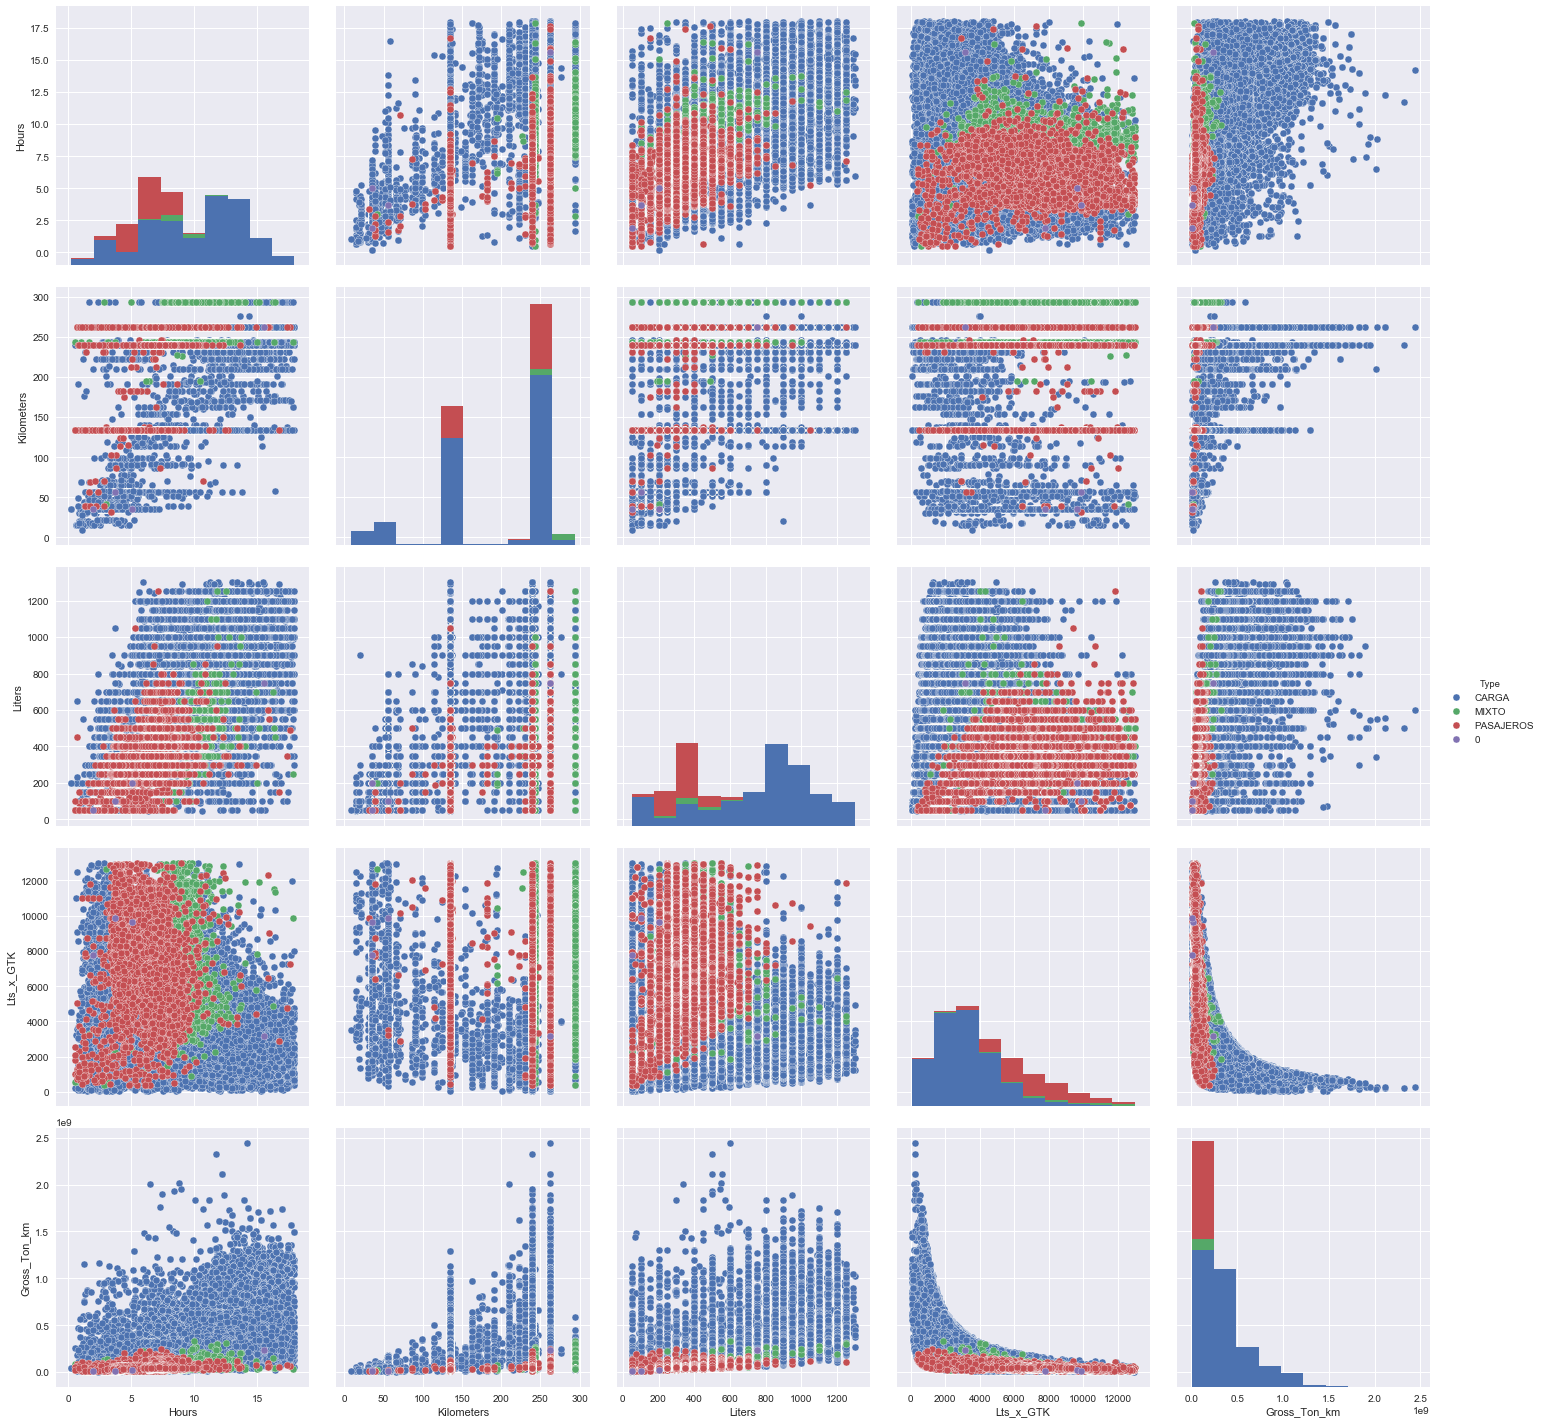

In [100]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(gtype.drop("id_Type", axis=1), hue="Type", size=4)

In [101]:
# Only take into account Freight Trainas
f = f[(f.id_Type == 1.0)]

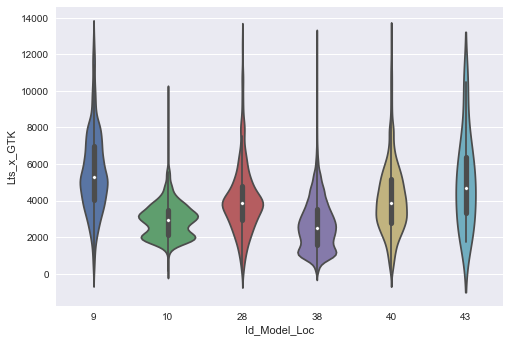

In [102]:
# A violin plot 
# Let's reduce the division to locomotive model
sns.violinplot(x="Id_Model_Loc", y="Lts_x_GTK", data=f, size=60)

In [103]:
cols = list(f.loc[:,'Id_Model_Loc':'Model_Loc']) + list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK'] + ['Gross_Ton_km']
gmodel= f[cols] 
# Show the mean grouped by type of train
gmodel.groupby(['Id_Model_Loc', 'Model_Loc']).mean()

Hours  Kilometers      Liters    Lts_x_GTK  \
Id_Model_Loc Model_Loc                                                   
9            GE U10B     7.488675  152.787034  328.018927  5529.577902   
10           GE C23EMP  10.534048  201.807546  939.608359  2940.115483   
28           GM          6.806573  120.439710  429.483152  4042.405421   
38           GE U20C    10.870149  202.203806  861.526540  2689.217660   
40           GM          8.399826  157.149146  553.368038  4103.268088   
43           0           2.102857   34.166667   80.952381  5072.069639   

                        Gross_Ton_km  
Id_Model_Loc Model_Loc                
9            GE U10B    7.109990e+07  
10           GE C23EMP  3.620542e+08  
28           GM         1.312563e+08  
38           GE U20C    4.340143e+08  
40           GM         1.717425e+08  
43           0          1.844853e+07

In [104]:
# Show the standard deviation grouped by type of train
gmodel.groupby(['Id_Model_Loc', 'Model_Loc']).std()

Hours  Kilometers      Liters    Lts_x_GTK  \
Id_Model_Loc Model_Loc                                                  
9            GE U10B    4.205400   93.280086  217.245034  2210.959917   
10           GE C23EMP  3.233588   63.177324  218.564693   944.262851   
28           GM         4.199987   82.067902  309.298819  1889.530605   
38           GE U20C    3.402235   63.243588  244.700018  1442.196511   
40           GM         4.311215   87.051189  312.243682  1958.562865   
43           0          0.500931    4.277071   46.033114  2514.371955   

                        Gross_Ton_km  
Id_Model_Loc Model_Loc                
9            GE U10B    5.980018e+07  
10           GE C23EMP  1.633080e+08  
28           GM         1.199705e+08  
38           GE U20C    2.809324e+08  
40           GM         1.336844e+08  
43           0          9.618504e+06

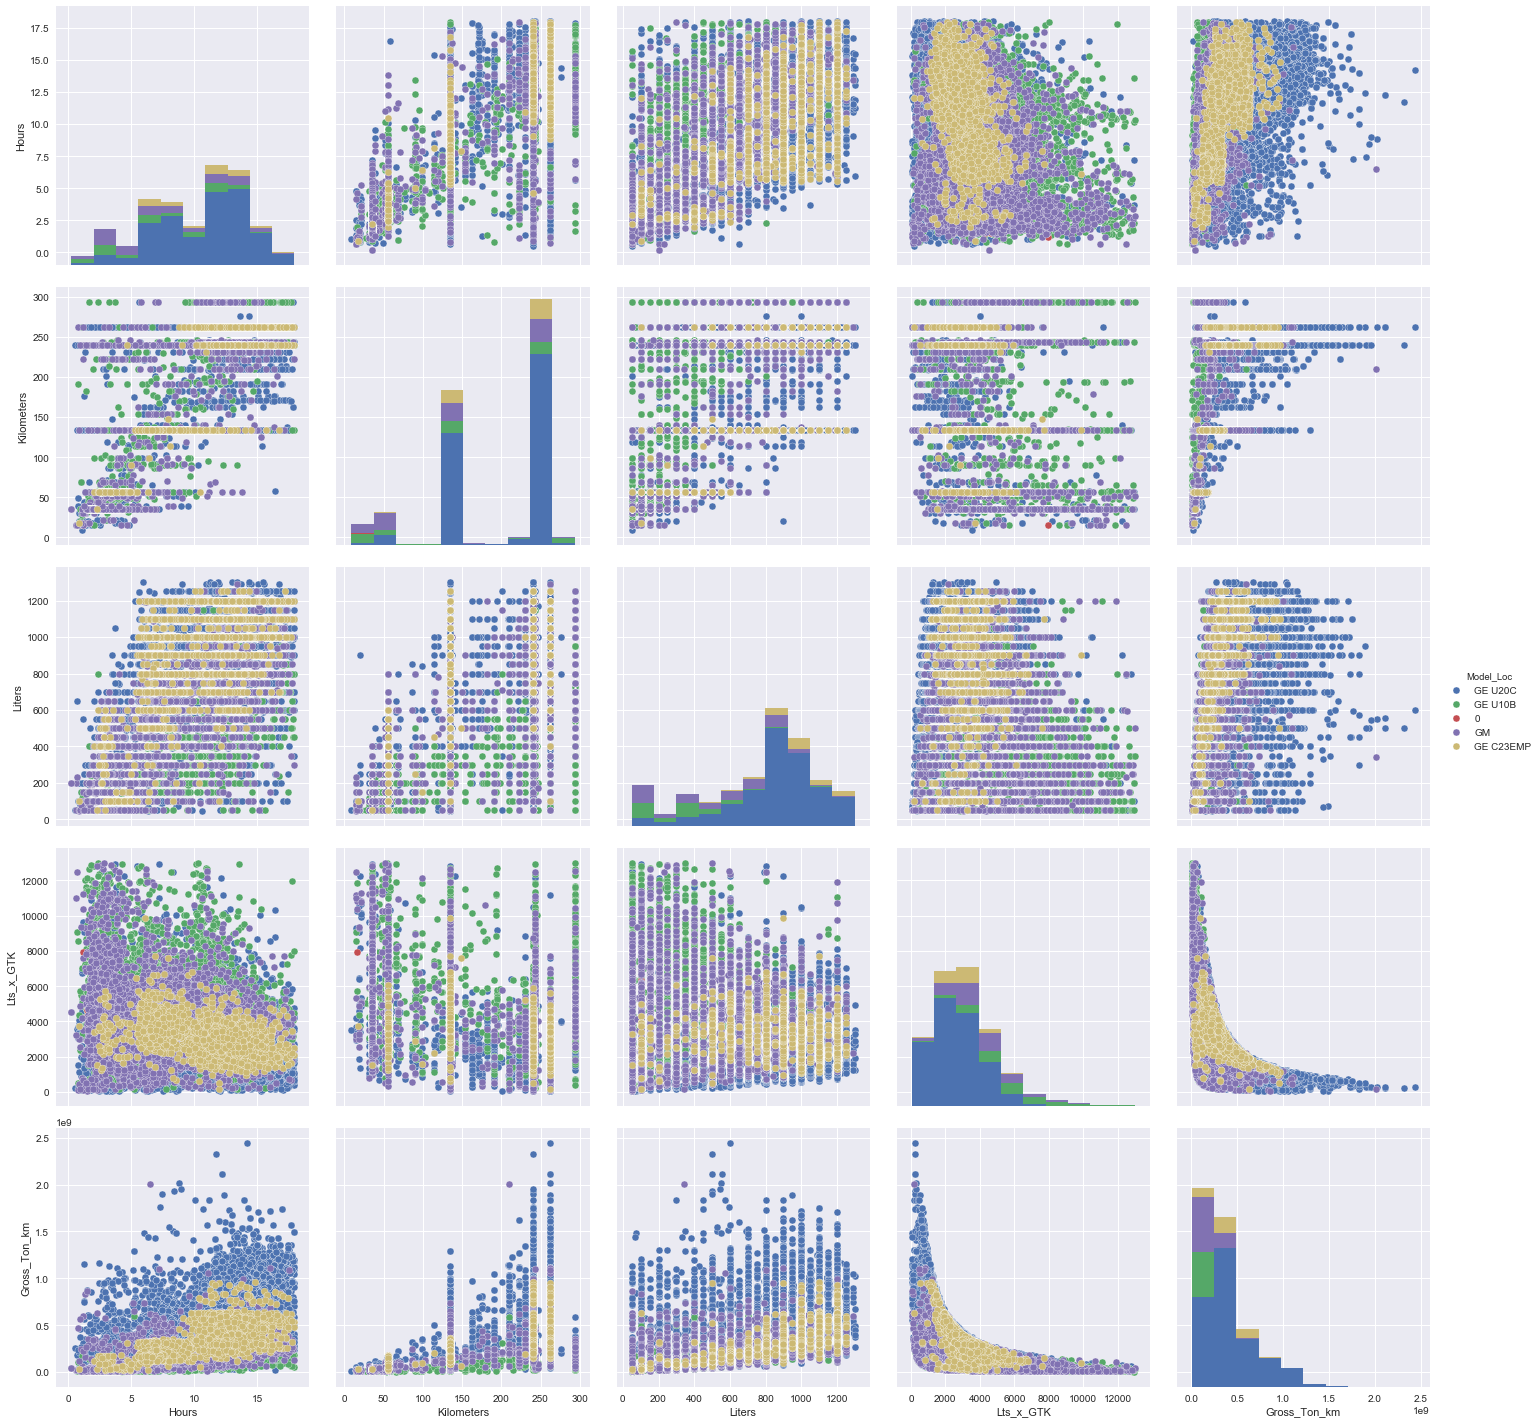

In [105]:
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(gmodel.drop("Id_Model_Loc", axis=1), hue="Model_Loc", size=4)

In [106]:
f = fuel
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)
f.fillna(0, inplace= True)
f = f[(f.Liters >40) & (f.Liters < 1300) & (f.IN == 'TREN')]

# Only take into account Freight Trains Single Locomotive
f = f[(f.id_Type == 1.0) & (f.Traccion == 'S')]
# Only take into account General Cargo Freight Trains, U20 Locomotives, originating in Santa Cruz going to Quijarro
f = f[(f.Id_Sub_Type == 2.0) & (f.Id_Model_Loc== 10) & (f.Direction == 0.0)  & (f.Hours < 24) & (f.Gross_Ton_km > 1000.0) & (f.Lts_x_GTK > 0.0) & (f.Lts_x_GTK < 4000.0)  & ((f.Track_id ==2) | (f.Track_id ==3) | (f.Track_id ==4))]
f.head(5)

IN  Train_Bulletin Sector  DateTime1  Id_Loc  Track_id  Id_Engineer  \
100  TREN           32224      E  29/4/2017    6586         2        111.0   
153  TREN           32375      E  11/5/2017    6625         2         67.0   
162  TREN           32404      E  14/5/2017    6586         2        114.0   
174  TREN           32425      E  15/5/2017    6625         2         22.0   
210  TREN           32224      E  30/4/2017    6586         3         23.0   

     Id_fireman  Hours  Kilometers     ...            Sub_Type  id_Type  \
100       263.0  14.72       261.7     ...       CARGA GENERAL      1.0   
153        92.0  13.42       261.7     ...       CARGA GENERAL      1.0   
162        91.0  12.17       261.7     ...       CARGA GENERAL      1.0   
174       233.0  14.10       261.7     ...       CARGA GENERAL      1.0   
210       249.0   7.40       134.2     ...       CARGA GENERAL      1.0   

      Type  Traccion  Direction Id_Model_Loc  Model_Loc Unnamed: 29  \
100  CARGA         S        0.0           10  GE C23EMP         0.0   
153  CARGA         S        0.0           10  GE C23EMP         0.0   
162  CARGA         S        0.0           10  GE C23EMP         0.0   
174  CARGA         S        0.0           10  GE C23EMP         0.0   
210  CARGA         S        0.0           10  GE C23EMP         0.0   

    Unnamed: 30    Lts_x_GTK  
100         0.0  2299.385094  
153         0.0  1757.483831  
162         0.0  1822.365578  
174         0.0  1937.315558  
210         0.0  3273.377942  

[5 rows x 32 columns]

In [107]:
f.dtypes

IN                 object
Train_Bulletin      int64
Sector             object
DateTime1          object
Id_Loc              int64
Track_id            int64
Id_Engineer       float64
Id_fireman        float64
Hours             float64
Kilometers        float64
Liters            float64
Net_Ton_Km        float64
Gross_Ton_km      float64
Net_Tons            int64
Gross_Tons          int64
Date               object
Locomotive          int64
Track              object
Maquinista         object
Auxiliar           object
Train_nbr          object
Id_Sub_Type       float64
Sub_Type           object
id_Type           float64
Type               object
Traccion           object
Direction         float64
Id_Model_Loc        int64
Model_Loc          object
Unnamed: 29       float64
Unnamed: 30       float64
Lts_x_GTK         float64
dtype: object

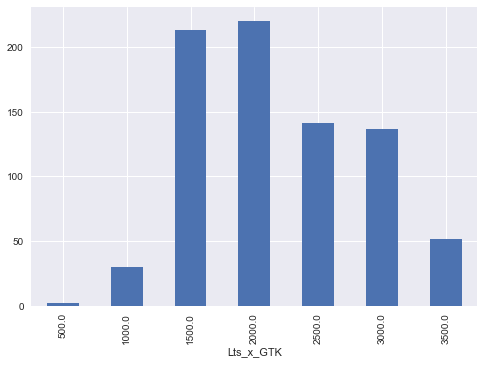

In [108]:
f.groupby((f.Lts_x_GTK // 500*500) ).size().plot(kind='bar')

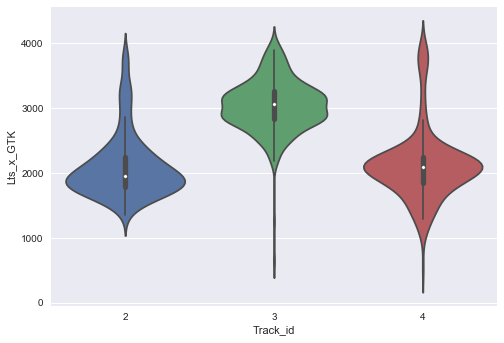

In [109]:
# A violin plot 
# Let's reduce the division to Cargo, Locomotive, Origin
sns.violinplot(x="Track_id", y="Lts_x_GTK", data=f, size=60)

In [110]:
cols =list(f.loc[:,'Track_id':'Track_id']) + list(f.loc[:,'Track':'Track']) +list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK'] + ['Gross_Ton_km'] 
gtrack= f[cols]
# Show the mean grouped by type of train
gtrack.groupby(['Track_id', 'Track']).mean()

Hours  Kilometers       Liters  \
Track_id Track                                                       
2        SUB DIVISION 2, GU-SJ  13.804927  261.106569  1047.627737   
3        SUB DIVISION 3, SJ-RO   7.378929  134.127143   873.571429   
4        SUB DIVISION 4, RO-CB  13.265021  239.800000  1092.323651   

                                  Lts_x_GTK  Gross_Ton_km  
Track_id Track                                             
2        SUB DIVISION 2, GU-SJ  2098.772569  5.225018e+08  
3        SUB DIVISION 3, SJ-RO  3039.453155  2.895842e+08  
4        SUB DIVISION 4, RO-CB  2117.380301  5.480191e+08

In [111]:
# Show the standard deviation grouped by type of train
gtrack.groupby(['Track_id', 'Track']).std()

Hours  Kilometers      Liters   Lts_x_GTK  \
Track_id Track                                                                 
2        SUB DIVISION 2, GU-SJ  1.732545    9.823025  138.423330  491.438142   
3        SUB DIVISION 3, SJ-RO  1.095814    1.219133  159.798580  405.371905   
4        SUB DIVISION 4, RO-CB  1.853151    0.000000  130.116915  546.390696   

                                Gross_Ton_km  
Track_id Track                                
2        SUB DIVISION 2, GU-SJ  1.184011e+08  
3        SUB DIVISION 3, SJ-RO  4.652528e+07  
4        SUB DIVISION 4, RO-CB  1.412692e+08

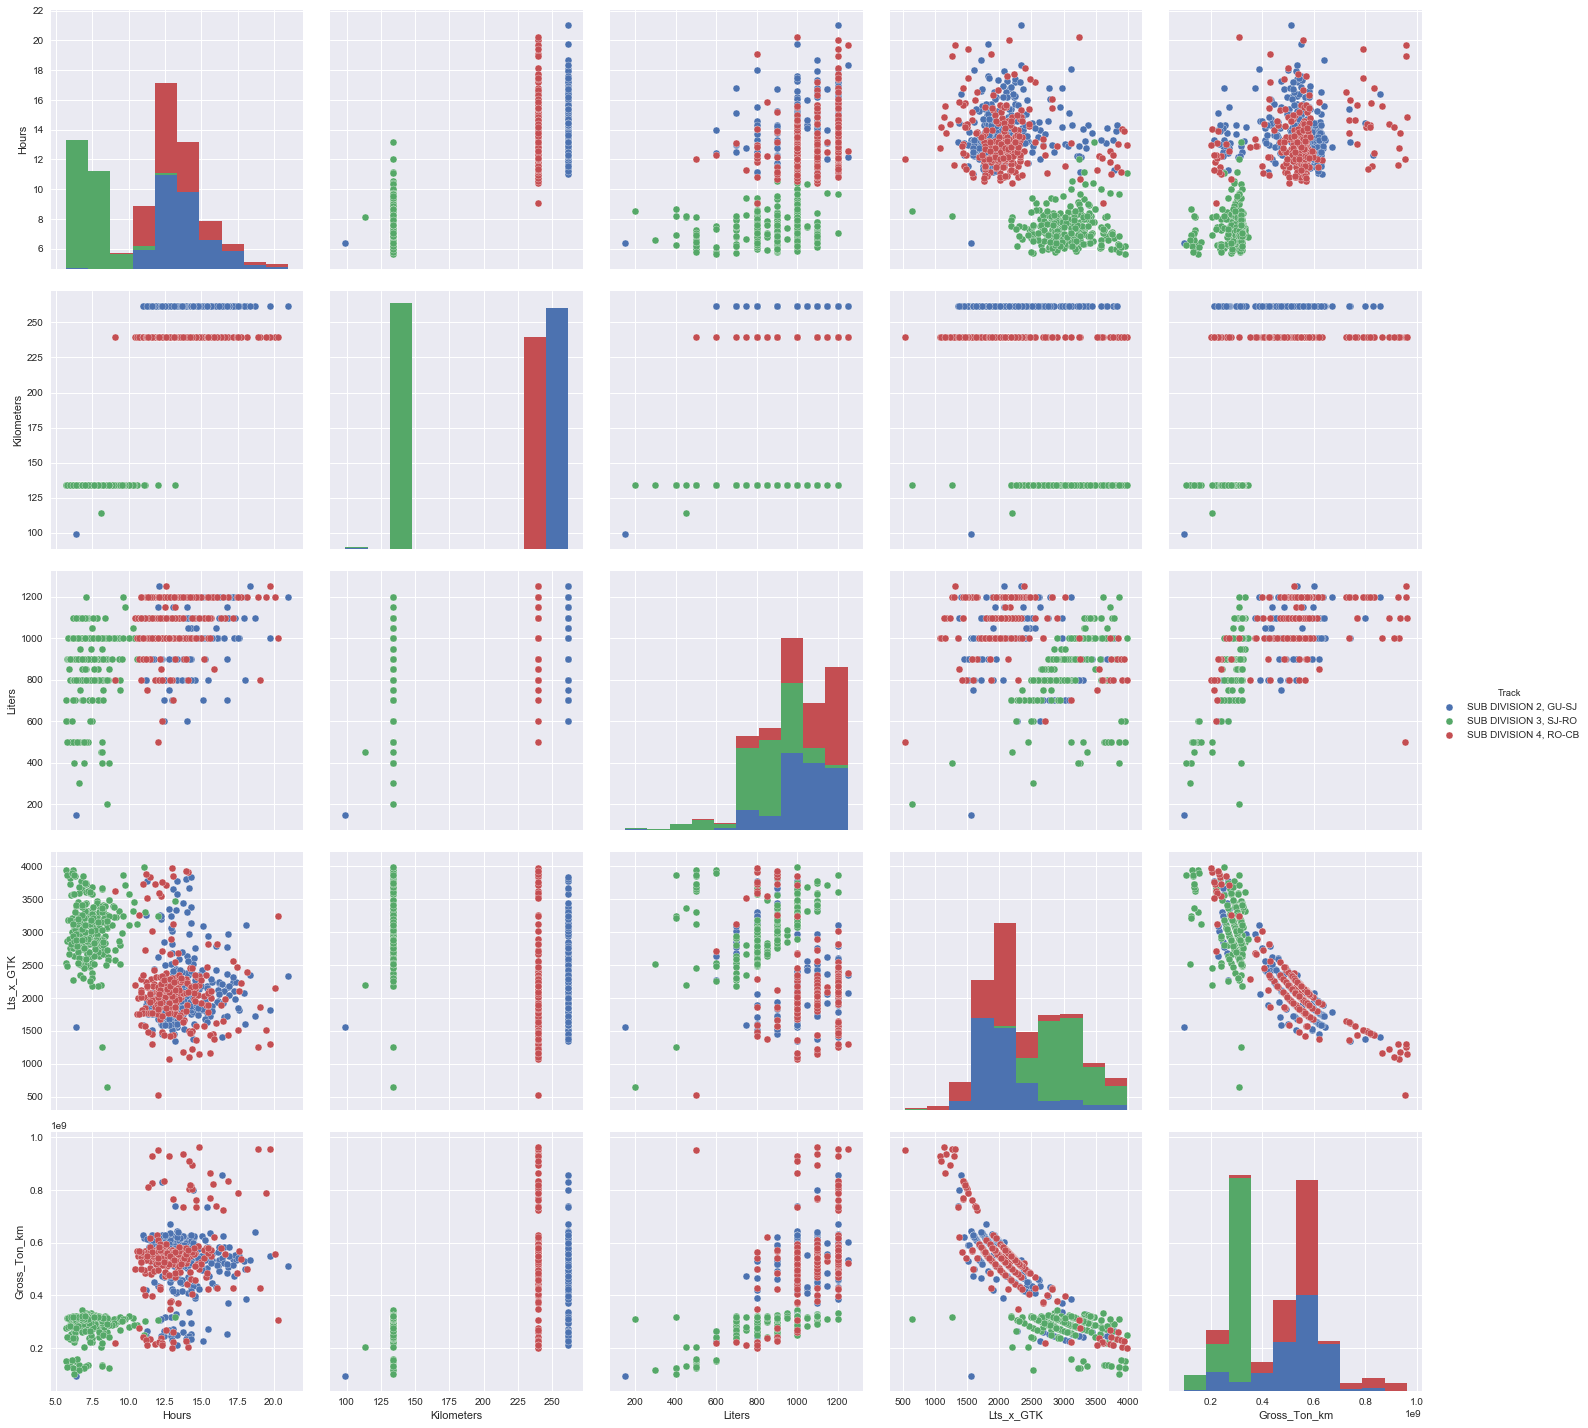

In [112]:
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(gtrack.drop("Track_id", axis=1), hue="Track", size=4)

In [113]:
f = fuel
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)

f = f[(f.Liters >40) & (f.Liters < 1300) & (f.IN == 'TREN')]
f.fillna(0, inplace= True)      
# Only take into account Freight Trains Single Locomotive
f = f[(f.id_Type == 1.0) & (f.Traccion == 'S')]
# Only take into account General Cargo Freight Trains, U20 Locomotives, originating in Santa Cruz going to Quijarro
f = f[(f.Id_Sub_Type == 2.0) & (f.Id_Model_Loc== 10) & (f.Direction == 1.0) & (f.Gross_Ton_km > 0.0) & (f.Lts_x_GTK > 1000.0) & (f.Lts_x_GTK < 4000.0)  & (f.Hours < 24)   & ((f.Track_id ==2) | (f.Track_id ==3) | (f.Track_id ==4))]
f.head(5)


C:\Users\225648\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


IN  Train_Bulletin Sector  DateTime1  Id_Loc  Track_id  Id_Engineer  \
80   TREN           32172      E  27/4/2017    6691         2         38.0   
82   TREN           32174      E  27/4/2017    6690         2         85.0   
95   TREN           32213      E  30/4/2017    6587         2         33.0   
101  TREN           32228      E  30/4/2017    6691         2        111.0   
129  TREN           32301      E   6/5/2017    6691         2         72.0   

     Id_fireman  Hours  Kilometers     ...            Sub_Type  id_Type  \
80         24.0  12.65       261.7     ...       CARGA GENERAL      1.0   
82        251.0  14.48       261.7     ...       CARGA GENERAL      1.0   
95         92.0  14.50       261.7     ...       CARGA GENERAL      1.0   
101       263.0  12.38       261.7     ...       CARGA GENERAL      1.0   
129       253.0  12.48       261.7     ...       CARGA GENERAL      1.0   

      Type  Traccion  Direction Id_Model_Loc  Model_Loc Unnamed: 29  \
80   CARGA         S        1.0           10  GE C23EMP         0.0   
82   CARGA         S        1.0           10  GE C23EMP         0.0   
95   CARGA         S        1.0           10  GE C23EMP         0.0   
101  CARGA         S        1.0           10  GE C23EMP         0.0   
129  CARGA         S        1.0           10  GE C23EMP         0.0   

    Unnamed: 30    Lts_x_GTK  
80          0.0  3336.215267  
82          0.0  1534.067056  
95          0.0  1919.857551  
101         0.0  1917.191761  
129         0.0  2154.132720  

[5 rows x 32 columns]

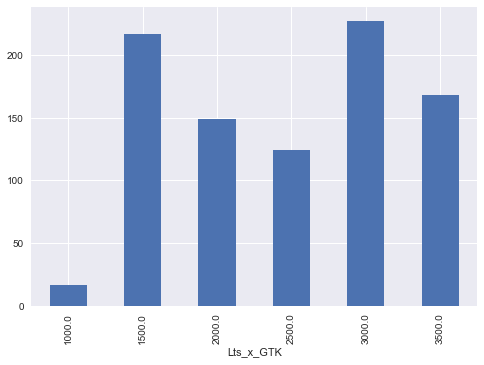

In [114]:
f.groupby((f.Lts_x_GTK // 500*500) ).size().plot(kind='bar')

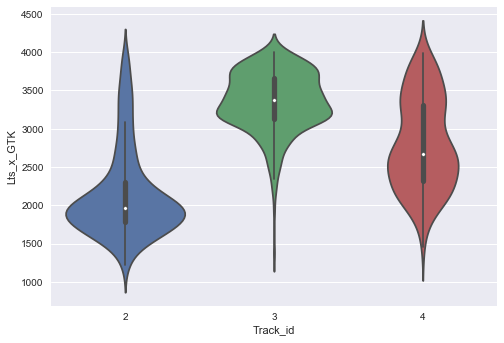

In [115]:
# A violin plot 
# Let's reduce the division to Cargo, Locomotive, Origin
sns.violinplot(x="Track_id", y="Lts_x_GTK", data=f, size=60)

In [116]:
cols =list(f.loc[:,'Track_id':'Track_id']) + list(f.loc[:,'Track':'Track']) +list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK'] + ['Gross_Ton_km'] 
gtrack= f[cols]
# Show the mean grouped by type of train
gtrack.groupby(['Track_id', 'Track']).mean()

Hours  Kilometers       Liters  \
Track_id Track                                                       
2        SUB DIVISION 2, GU-SJ  12.299799  261.700000  1047.236181   
3        SUB DIVISION 3, SJ-RO   7.880086  134.200000   945.962536   
4        SUB DIVISION 4, RO-CB  14.063376  238.386624  1085.987261   

                                  Lts_x_GTK  Gross_Ton_km  
Track_id Track                                             
2        SUB DIVISION 2, GU-SJ  2142.427676  5.200237e+08  
3        SUB DIVISION 3, SJ-RO  3350.752474  2.839619e+08  
4        SUB DIVISION 4, RO-CB  2797.198805  4.102455e+08

In [117]:
# Show the standard deviation grouped by type of train
gtrack.groupby(['Track_id', 'Track']).std()

Hours  Kilometers      Liters   Lts_x_GTK  \
Track_id Track                                                                 
2        SUB DIVISION 2, GU-SJ  1.616949    0.000000  112.303114  577.462200   
3        SUB DIVISION 3, SJ-RO  1.532856    0.000000  156.410647  390.562488   
4        SUB DIVISION 4, RO-CB  1.781298   17.709548  145.865498  591.939826   

                                Gross_Ton_km  
Track_id Track                                
2        SUB DIVISION 2, GU-SJ  1.296992e+08  
3        SUB DIVISION 3, SJ-RO  4.447398e+07  
4        SUB DIVISION 4, RO-CB  1.157317e+08

In [118]:
# Show the mode grouped by type of train
mode = lambda x: x.mode() if len(x) > 2 else np.array(x)
gtrack.groupby(['Track_id', 'Track']).apply(pd.DataFrame.median).reset_index(drop=True)

Track_id  Hours  Kilometers  Liters    Lts_x_GTK  Gross_Ton_km
0       2.0  12.00       261.7  1000.0  1961.550894  5.569128e+08
1       3.0   7.62       134.2  1000.0  3372.891912  2.995779e+08
2       4.0  13.92       239.8  1100.0  2663.330639  4.095741e+08

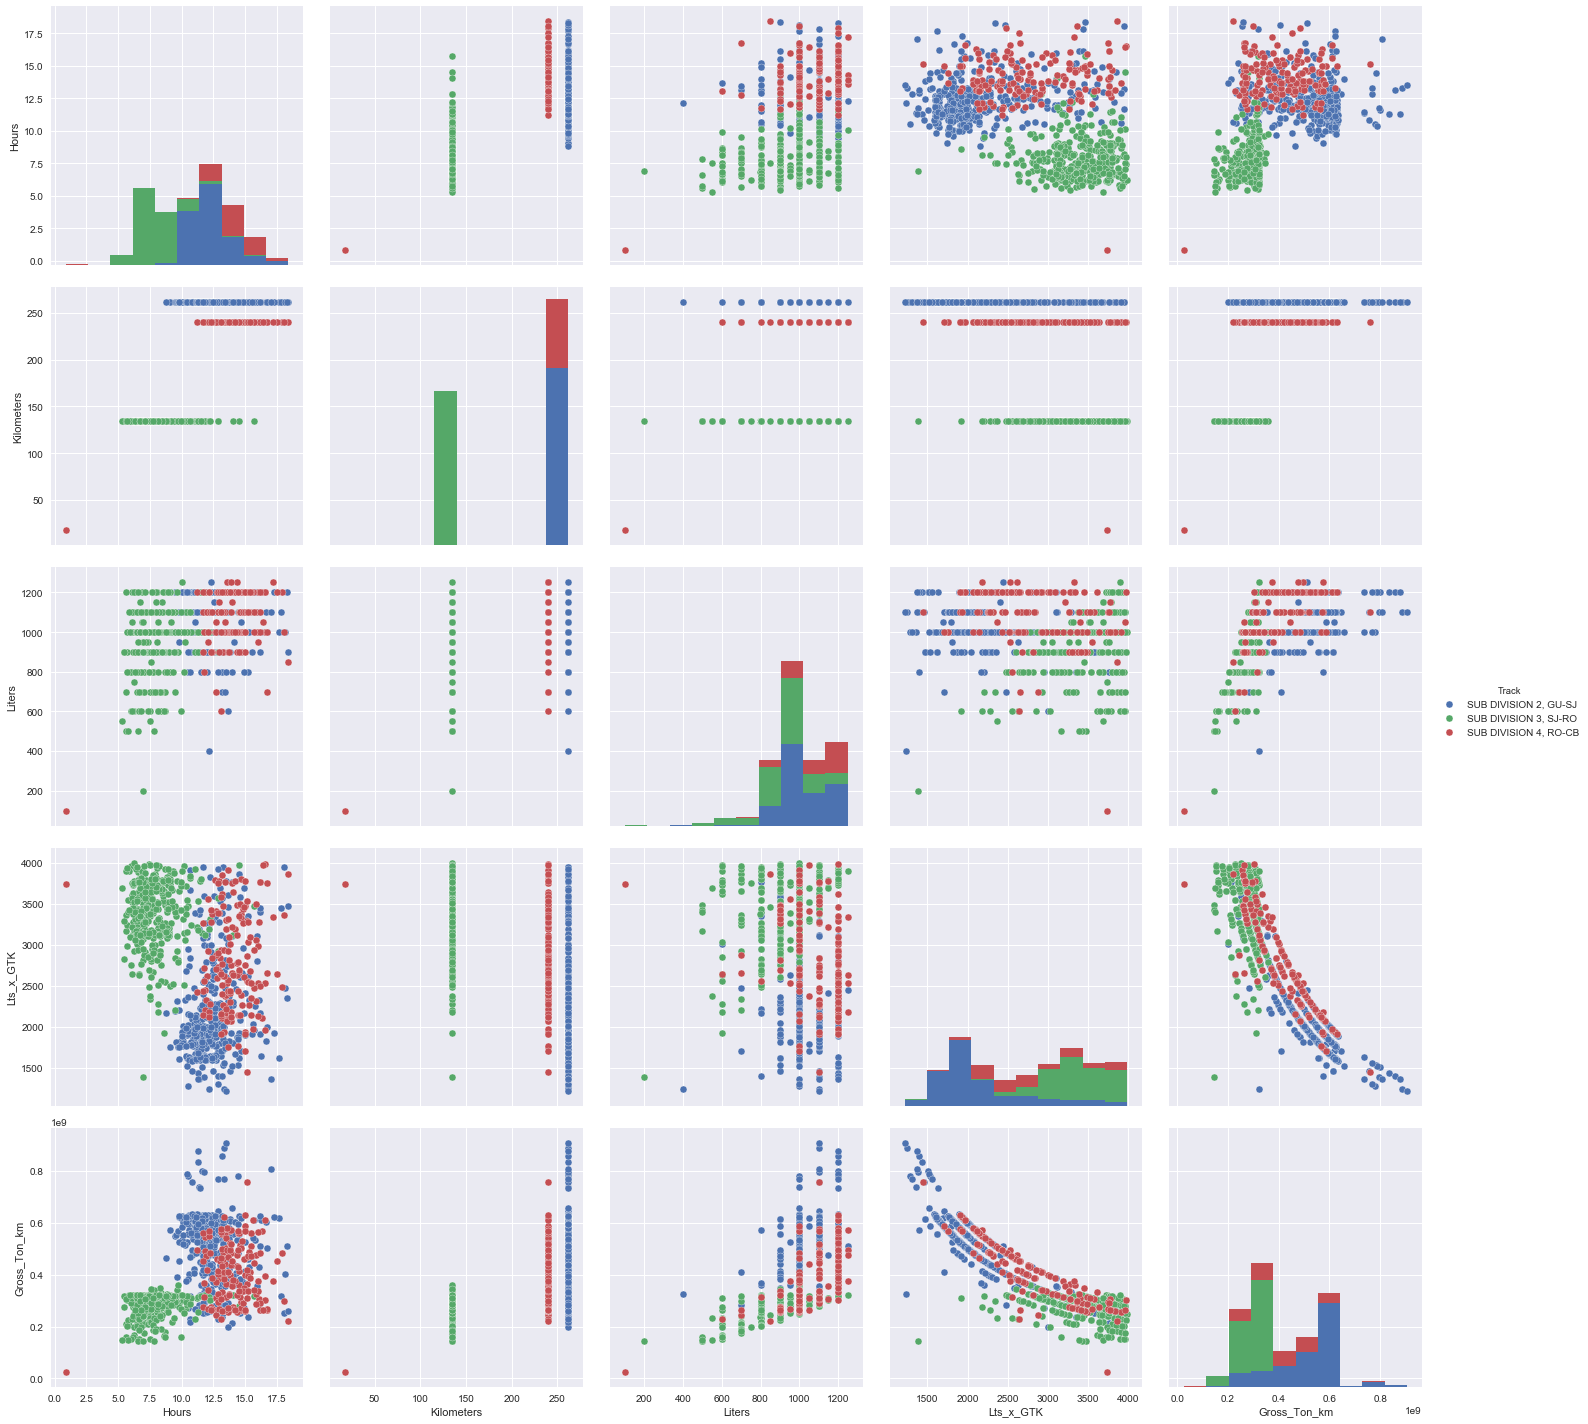

In [119]:
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(gtrack.drop("Track_id", axis=1), hue="Track", size=4)

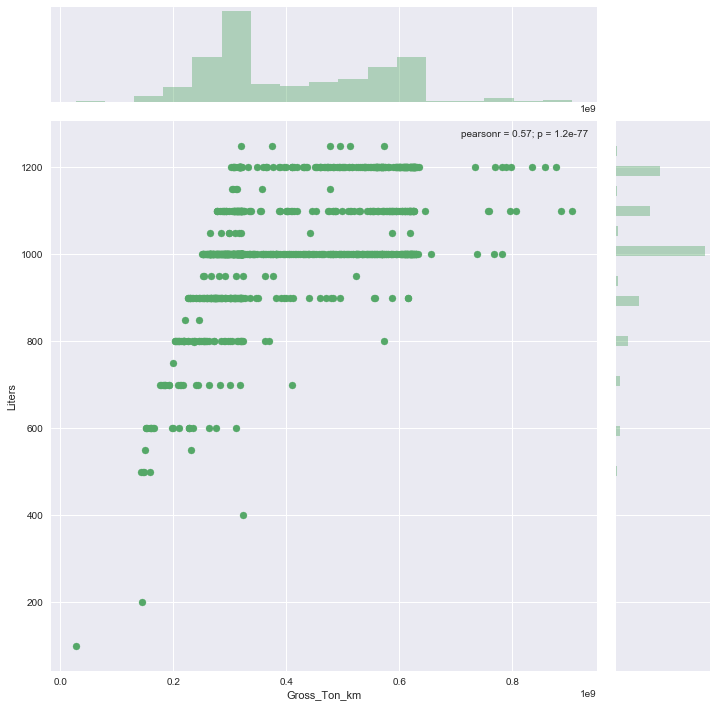

In [121]:
# Show the whole data distribution with a  joint
sns.jointplot(x="Gross_Ton_km", y="Liters", color = "g", data=gtrack, size=10)